# Matplotlib
* https://matplotlib.org
* Aqui as ferramentas do matplotlib serão apresentadas e a ideia é buscar aprofundamento na ***documentação***
* No projeto analisando dados do instagram conseguimos levantar algumas hipóteses utilziando estatísticas, mas isso é pouco
* Precisamos mostrar como nossos dados estão distríbuidos, como eles se comportam e como podemos mostrar para os nossos clientes
* Permite a criação e visualizações estáticas mais simples até os gráficos mais complexos e elaborados
* Existem diversas bibliotecas para visualização porém a matplotlib é a melhor par começar
* Como dia a própria documentação, ele torna o que é fácil, fácil e as coiss difíceis, possíveis de serem feitas!
* Ela é bem completa e também é útil para analytics 
* Não possui tanta customização quanto outras bibliotecas e ***pode deixar a desejar no apelo estético em alguns casos***

## Pyplot
* O Pyplot é o módulo do matplotlib que possui os gráficos básicosnormalmente usados nessa biblioteca
* Como vai ser muito usado vai ser um módulo importado diretamente




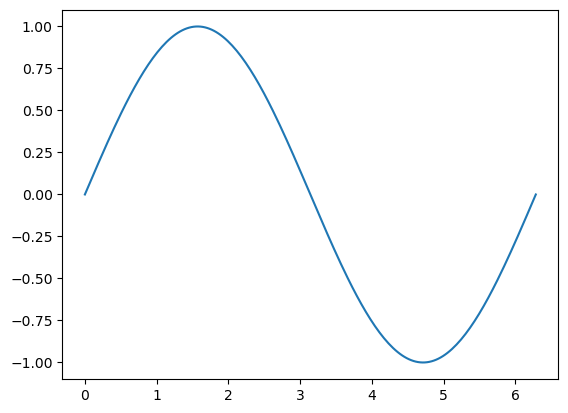

In [1]:
# Criando o primeiro plot 
# Disponível em: https://matplotlib.org/stable/users/getting_started/index.html
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 2 * np.pi, 200)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

In [1]:
import matplotlib.pyplot as plt # importanto matplotlib

import numpy as np # importando numpy
import pandas as pd # importando pandas
import datetime as dt # importando datetime

## Vamos usar a base do instagram
* Já interpretamos esses dados por meio análises estatísticas
* Temos uma noção da sua visuzalição em tabela
* Fica como uma forma complementar para aprofundarmos mais e tentar chegar mais próximo da realidade do que um cientista de dados faz

In [5]:
base = pd.read_excel("08. Analisando o engajamento no Instagram.xlsx") # importar a base do excel
base = base.drop("Visualizações", axis=1) # Apagando a coluna "Visualizações"
base.loc[base.Carrossel.isnull(),"Carrossel"] = "N" # Atribuindo o valor N para coluna carrosel

In [6]:
base.head() # Exibindo primeiras linhas do dataframe

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,N,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,N,5164
4,Foto,2021-09-13,4392,45,Produtos,S,N,N,4437


## Criando um plot no matplotlib
* https://matplotlib.org/stable/plot_types/basic/plot.html

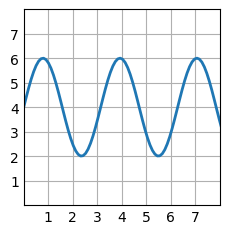

In [7]:
plt.style.use('_mpl-gallery')

# make data
x = np.linspace(0, 10, 100)
y = 4 + 2 * np.sin(2 * x)

# plot tudo para baixo, podemos ter mais de um, tendo inclusive na forma de grid ou matriz, passando como argumentos do subplots
fig, ax = plt.subplots() #Relacionado a figura

ax.plot(x, y, linewidth=2.0) # Aqui é o tipo do plot, gráfico de linha, coluna, sctter etc.

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))
# Uma dica para aprender documentação é tirar as coisas, por exemplo argumentos ou funções 
# E ver como eles funcionam, se eles se relacionam e o nível de influência
plt.show()

# Partes da figura
* Mostra cada parte da figura que nós podemos alterar
* Também encontra-se na [documentação](https://matplotlib.org/stable/users/explain/quick_start.html)
![Partes da figura](https://matplotlib.org/stable/_images/anatomy.png)


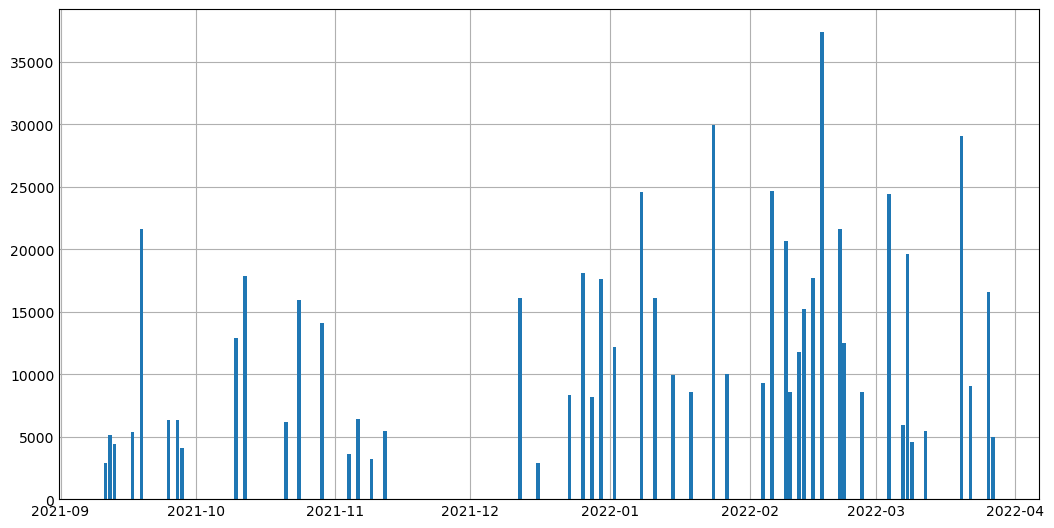

In [15]:
# Make data
x = base.Data # Seguimos a mesma lógica da documentação
y = base.Curtidas

fig, ax = plt.subplots(figsize=(10,5)) 

ax.plot(x, y, linewidth=2.0)  # Podemos plotar de outas formas também usando outros gráficos basta olhar
# https://matplotlib.org/stable/plot_types/index.html
# O jeito que decidimos mostrar os dados vai depender do jeito que está criando, a forma, como quer apresentar para o seu público
# Ou seja é cada vez mais importante conhecer seu público/seu cliente
plt.show()

## Será que existe uma tendência de queda nas curtidas?
* Vamos fazer uma análise mensak
    * Para isso precisamos criar a coluna mês/ano

In [18]:
base["mes"] = base.Data.dt.year*100 + base.Data.dt.month  # Criando a coluna mês, o dt já foi importado
base.head() # Verificando se a coluna foi criada

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes,mês,mes
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874,202109,202109
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,N,2958,202109,202109
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816,202109,202109
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,N,5164,202109,202109
4,Foto,2021-09-13,4392,45,Produtos,S,N,N,4437,202109,202109


In [34]:
# Para transformar em gráfico, podemos usar o groupby para conseguir fazer essa transformação
media_mensal = base.groupby("mes")["Curtidas"].mean()
print(media_mensal)

mes
202109     6181.500000
202110    13390.400000
202111     4682.000000
202112    11863.833333
202201    15913.285714
202202    17081.363636
202203    13299.555556
Name: Curtidas, dtype: float64


In [35]:
type(media_mensal) # É uma série com seus indices e valores

pandas.core.series.Series

In [38]:
media_mensal.index # Aqui conseguimos ver seu index

Index([202109, 202110, 202111, 202112, 202201, 202202, 202203], dtype='int32', name='mes')

In [39]:
 media_mensal.values # E aqui seus valores

array([ 6181.5       , 13390.4       ,  4682.        , 11863.83333333,
       15913.28571429, 17081.36363636, 13299.55555556])

In [32]:
tabela = pd.pivot_table(base, values ="Curtidas", index="mes") # No curso datacamp Mostra que também podemos usar o pivot_table 
print(tabela) # ele faz algo similar ao groupby porém em forma de tabela

            Curtidas
mes                 
202109   6181.500000
202110  13390.400000
202111   4682.000000
202112  11863.833333
202201  15913.285714
202202  17081.363636
202203  13299.555556


In [36]:
type(tabela)  # Aqui podemos ver que ele é um DataFrame

pandas.core.frame.DataFrame

In [40]:
tabela.index # Aqui exibimos seu index

Index([202109, 202110, 202111, 202112, 202201, 202202, 202203], dtype='int32', name='mes')

***Usamos o groupby para criar o gráfico***

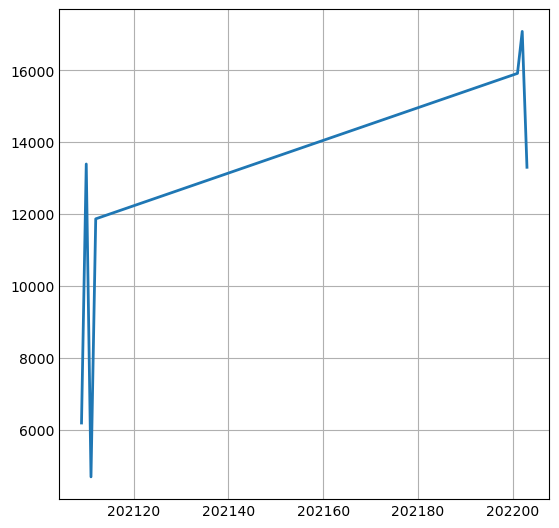

In [44]:
x = media_mensal.index
y = media_mensal.values

#plot
fig, ax = plt.subplots(figsize=(5,5))

ax.plot(x, y, linewidth=2.0)

plt.show() # O plot ficou estranho devido ao intervalo de tempo que não possui alguns valores, ele considera a data como um inteiro absoluto
# então ele só liga do último valor que teve até o próximo

***Uma forma de resolver é considerar como string ao invés de um inteiro***

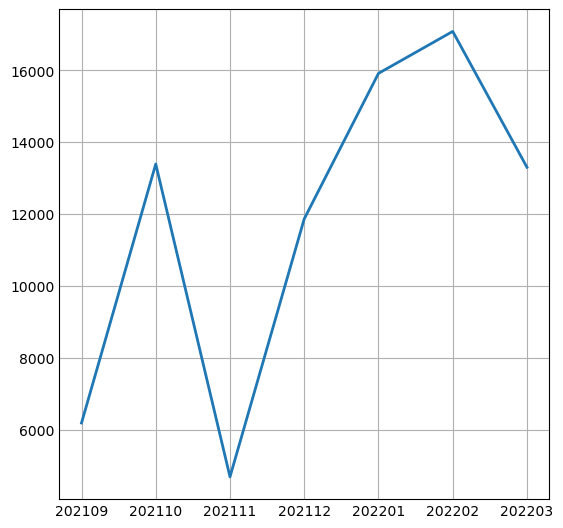

In [46]:
x = media_mensal.index.astype(str)
y = media_mensal.values

#plot
fig, ax = plt.subplots(figsize=(5,5))

ax.plot(x, y, linewidth=2.0)

plt.show()

* Pode ser um indicador, teve um pico de curtidas, porque? No instagram será que estava mostrando melhor o conteúdo
* Será que talvez como era o começo da página as pessoas estavam mais engajadas em curtir
* Porque será que caiu, porque as pessoas começaram a seguir outras páginas
* Depois organicamente aumentamos as curtidas, e depois tive uma queda, devo me preocupar? ***Depende***

## Adicionando novos dados nesse gráfico

In [47]:
# Fazendo para o mínimo e máximo par verificar se a média é condizente 
minimo = base.groupby("mes")["Curtidas"].min() 
maximo = base.groupby("mes")["Curtidas"].max()

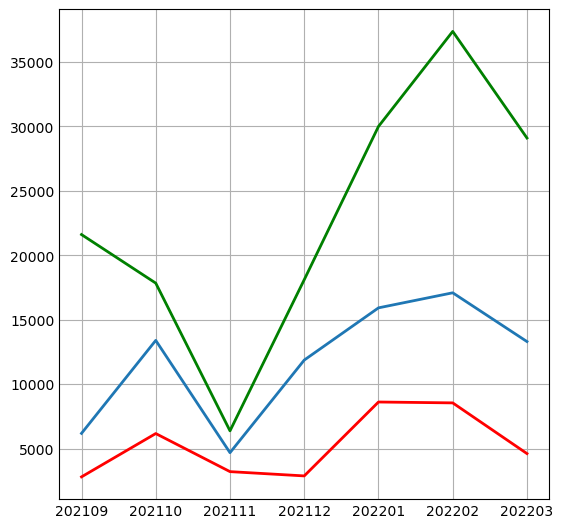

In [49]:
# make data
x = media_mensal.index.astype(str)
y = media_mensal.values
x1 = minimo.index.astype(str)
y1 = minimo.values
x2 = maximo.index.astype(str)
y2 = maximo.values

# plot
fig, ax = plt.subplots(figsize=(5,5))
# Traçando novos gráficos para comporação
ax.plot(x, y, linewidth=2.0)
ax.plot(x1, y1, linewidth=2.0, color="r")
ax.plot(x2, y2, linewidth=2.0, color='g')


plt.show()

***Com isso conseguimos perceber um outliner puxando a média***
* O que será que aconteceu, teve algum problema? Tentar entender o mínimo e o máximo
* O que será que puxou a média para cima que gerou esse resultado

In [52]:
base[base.mes>=202202].sort_values(["mes","Curtidas"], ascending=False)

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes,mês,mes
48,Foto,2022-03-20,29084,479,Datas comemorativas/Promoções,S,S,N,29563,202203,202203
43,Foto,2022-03-04,24399,266,NaN,S,S,N,24665,202203,202203
45,Reels,2022-03-08,19621,275,Trends,S,S,N,19896,202203,202203
50,Foto,2022-03-26,16551,186,NaN,S,N,N,16737,202203,202203
49,Foto,2022-03-22,9087,106,NaN,S,S,N,9193,202203,202203
44,IGTV,2022-03-07,5918,116,Dicas de como usar/Novos Produtos,S,N,N,6034,202203,202203
47,IGTV,2022-03-12,5489,77,Dicas de como usar/Novos Produtos,S,N,N,5566,202203,202203
51,IGTV,2022-03-27,4934,65,Dicas de como usar/Produtos,S,N,N,4999,202203,202203
46,Foto,2022-03-09,4613,50,Influenciadores,S,N,N,4663,202203,202203
39,Foto,2022-02-17,37351,502,Promoções,S,S,N,37853,202202,202202


***Dessa forma conseguimos ver o que puxou mais as curtidas e foram promoções***
* Será que a promoção ta sendo boa, ou trazendo algo que não é orgânico?
* Será que beneficia aquele post e afeta os outros?
* O gráfico te ajuda a apresentar e a entender melhor sua análise e aprofundar nela, de forma visual é um pouco mais fácil